In [217]:
%run ./Titanic/connect_to_database.py

In [219]:
query = "SELECT * FROM titanic"
titanic = pd.read_sql(query, db_engine)

In [221]:
titanic

,PassengerId,PClass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,EmbarkDate
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,,S,0,10-4-1912
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C,1,11-4-1912
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.93,,S,1,10-4-1912
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S,1,10-4-1912
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,,S,0,10-4-1912
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,0.0,0,0,A.5. 3236,8.05,,S,0,10-4-1912
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.90,C105,C,1,11-4-1912
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.25,,S,0,10-4-1912
1307,1308,3,"Ware, Mr. Frederick",male,0.0,0,0,359309,8.05,,S,0,10-4-1912


Sul database titanic, effettuiamo le seguenti analisi: 

• Quanti ponti c'erano sulla nave? 

• Visualizzare un grafico con il numero di passeggeri di ogni classe di imbarco 

• Fare la stessa cosa per la colonna alive 

• Qual era la distribuzione delle tariffe (fare)? 

• Riusciamo a vedere la distribuzione delle età dei passeggeri rispetto alla classe di imbarco? Proviamo con un boxplot e con un violinplot 

• Visualizziamo un boxplot rispetto alle colonne fare e survived; che cose ne deduciamo?

In [224]:
titanic["Deck"] = titanic.Cabin.str[0]

In [226]:
titanic

,PassengerId,PClass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,EmbarkDate,Deck
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,,S,0,10-4-1912,NaN
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C,1,11-4-1912,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.93,,S,1,10-4-1912,NaN
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S,1,10-4-1912,C
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,,S,0,10-4-1912,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,0.0,0,0,A.5. 3236,8.05,,S,0,10-4-1912,NaN
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.90,C105,C,1,11-4-1912,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.25,,S,0,10-4-1912,NaN
1307,1308,3,"Ware, Mr. Frederick",male,0.0,0,0,359309,8.05,,S,0,10-4-1912,NaN


In [228]:
#Quanti ponti c'erano sulla nave?
print(titanic.groupby("Deck")["Deck"].count())
print(f"\n{titanic.groupby("Deck")["Deck"].count().shape[0]} ponti")
print(f"\nO forse {titanic.groupby("Deck")["Deck"].count().shape[0]-1} ponti, c'e' una sola cabina che inizia per T")

Deck
A    22
B    65
C    94
D    46
E    41
F    21
G     5
T     1
Name: Deck, dtype: int64

8 ponti

O forse 7 ponti, c'e' una sola cabina che inizia per T


In [230]:
#I NaN sono stati ignorati 

In [232]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: ylabel='Frequency'>

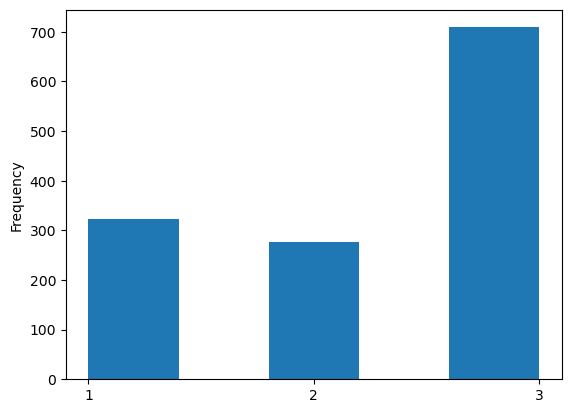

In [234]:
#Visualizzare un grafico con il numero di passeggeri di ogni classe di imbarco
titanic["PClass"].plot(kind="hist", bins=5, xticks=[1,2,3])

<Axes: xlabel='PClass'>

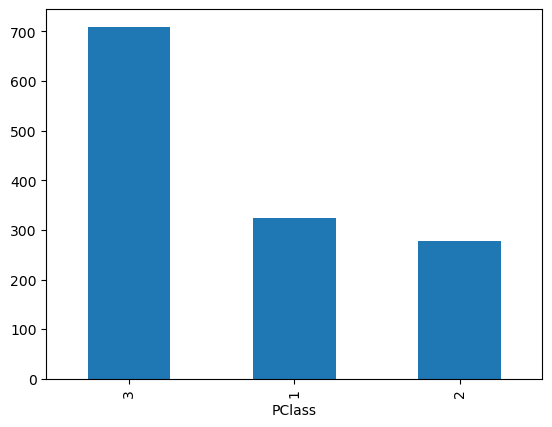

In [236]:
titanic["PClass"].value_counts().plot(kind="bar")

<Axes: xlabel='PClass', ylabel='count'>

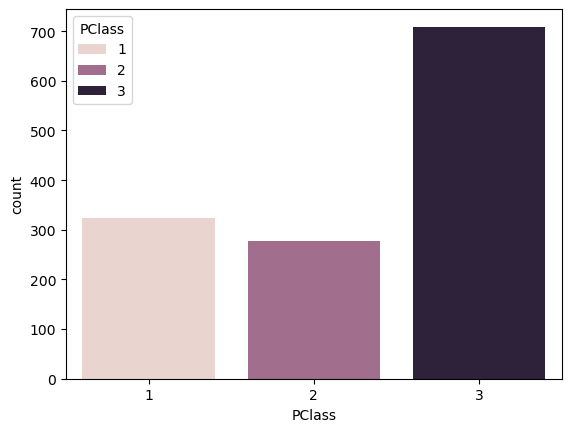

In [240]:
sns.countplot(data=titanic, x="PClass", hue="PClass")

<Axes: ylabel='Frequency'>

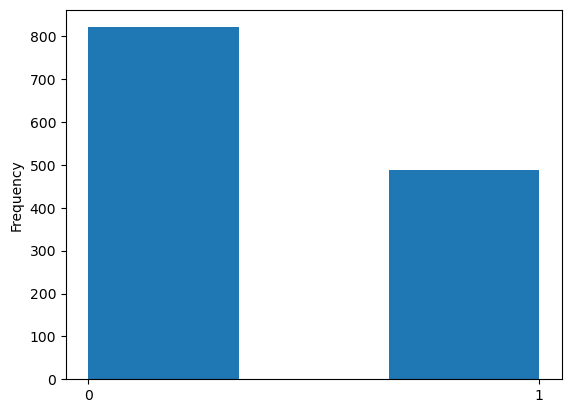

In [242]:
#Fare la stessa cosa per la colonna "Survived"
titanic["Survived"].plot(kind="hist", bins=3, xticks=[0,1])

<Axes: xlabel='Survived'>

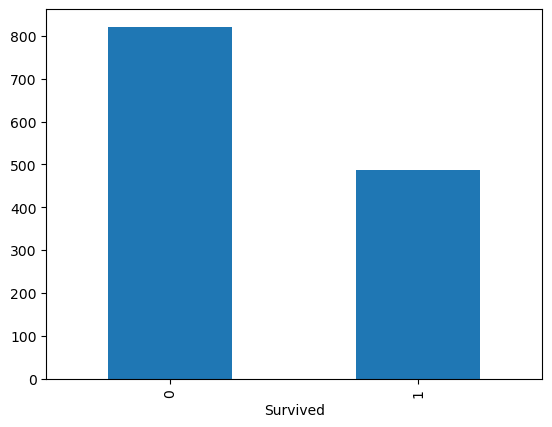

In [244]:
titanic["Survived"].value_counts().plot(kind="bar")

<Axes: ylabel='Frequency'>

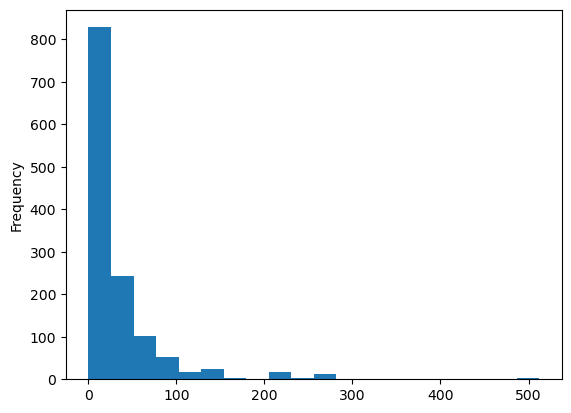

In [250]:
#Qual era la distribuzione delle tariffe (fare)
titanic["Fare"].plot(kind="hist", bins=20)

<Axes: xlabel='PClass', ylabel='Age'>

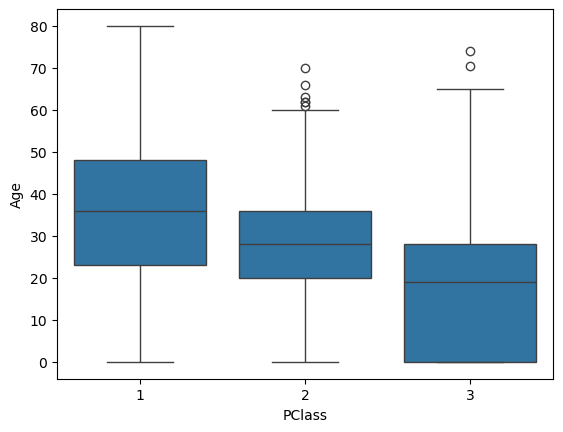

In [252]:
#Riusciamo a vedere la distribuzione delle età dei passeggeri rispetto alla classe di imbarco? Proviamo con un boxplot e con un violinplot
sns.boxplot(data=titanic, x="PClass", y="Age")

<Axes: xlabel='PClass', ylabel='Age'>

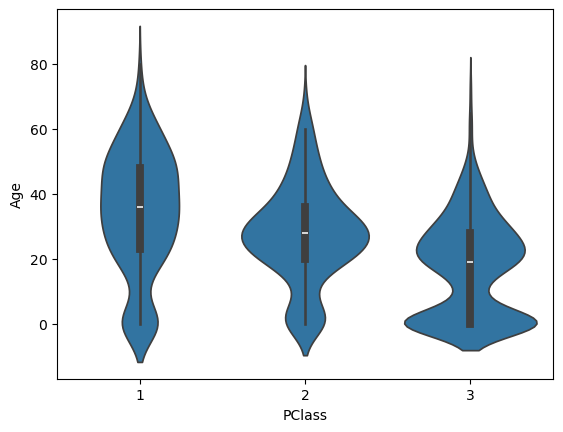

In [254]:
sns.violinplot(data=titanic, x="PClass", y="Age")

<Axes: xlabel='Survived', ylabel='Fare'>

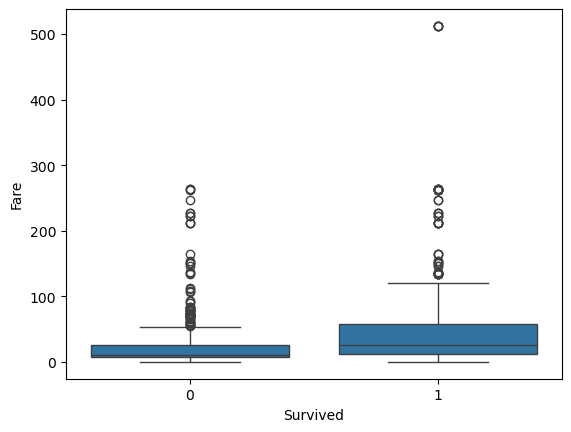

In [256]:
#Visualizziamo un boxplot rispetto alle colonne fare e survived; che cose ne deduciamo?
sns.boxplot(data=titanic, x="Survived", y="Fare")

In [258]:
titanic.groupby("Survived")["Fare"].agg(["median"])

,median
Survived,
0,10.5
1,26.0


In [260]:
#avresti avuto piu' speranze di sopravvivere se avessi speso di piu' per il biglietto

Scarichiamo il dataset stockdata.csv da https://github.com/plotly/datasets/blob/master/stockdata.csv e: 

• Visualizziamo l'andamento delle azioni della Apple ("AAPL") 

• Visualizziamo l'andamento di tutte le azioni del dataset 

• Visualizziamo l'andamento di Microsoft ("MSFT") e IBM ("IBM") negli anni 2012 e 2013 

• Con un istogramma, troviamo il range di valori che le azioni di Microsoft hanno assunto più spesso

In [265]:
stock = pd.read_csv("../Desktop/more_datasets/stockdata.csv")
stock

,MSFT,IBM,SBUX,AAPL,GSPC,Date
0,23.950705,80.517962,16.149666,11.086612,1416.599976,2007-01-03
1,23.910599,81.378851,16.167992,11.332687,1418.339966,2007-01-04
2,23.774242,80.642129,16.099269,11.251984,1409.709961,2007-01-05
3,24.006852,81.867244,16.039710,11.307550,1412.839966,2007-01-08
4,24.030914,82.835742,15.970989,12.246870,1412.109985,2007-01-09
...,...,...,...,...,...,...
2301,51.360001,132.800003,58.110001,96.099998,1929.800049,2016-02-24
2302,52.099998,134.500000,58.750000,96.760002,1951.699951,2016-02-25
2303,51.299999,132.029999,58.340000,96.910004,1948.050049,2016-02-26
2304,50.880001,131.029999,58.209999,96.690002,1932.229980,2016-02-29


<Axes: xlabel='Date'>

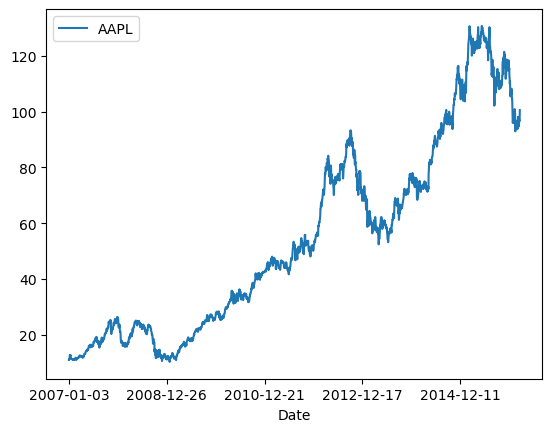

In [267]:
#Visualizziamo l'andamento delle azioni della Apple ("AAPL")
stock.plot(x="Date",y="AAPL",)

<Axes: xlabel='Date'>

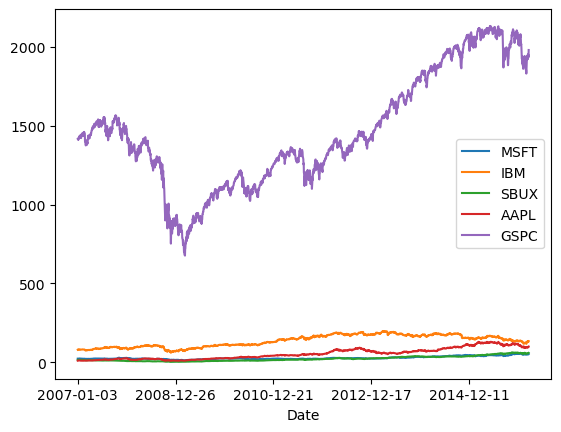

In [269]:
#Visualizziamo l'andamento di tutte le azioni del dataset
stock = stock.set_index("Date")
stock.plot()

In [271]:
#Visualizziamo l'andamento di Microsoft ("MSFT") e IBM ("IBM") negli anni 2012 e 2013
stock = stock.reset_index()
stock

,Date,MSFT,IBM,SBUX,AAPL,GSPC
0,2007-01-03,23.950705,80.517962,16.149666,11.086612,1416.599976
1,2007-01-04,23.910599,81.378851,16.167992,11.332687,1418.339966
2,2007-01-05,23.774242,80.642129,16.099269,11.251984,1409.709961
3,2007-01-08,24.006852,81.867244,16.039710,11.307550,1412.839966
4,2007-01-09,24.030914,82.835742,15.970989,12.246870,1412.109985
...,...,...,...,...,...,...
2301,2016-02-24,51.360001,132.800003,58.110001,96.099998,1929.800049
2302,2016-02-25,52.099998,134.500000,58.750000,96.760002,1951.699951
2303,2016-02-26,51.299999,132.029999,58.340000,96.910004,1948.050049
2304,2016-02-29,50.880001,131.029999,58.209999,96.690002,1932.229980


<Axes: xlabel='Date'>

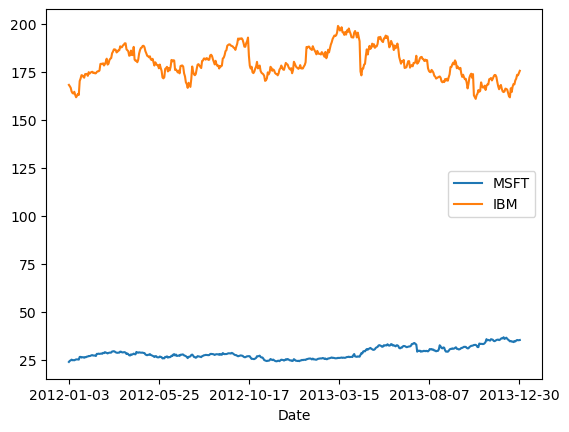

In [273]:
filtro_12_13 = (pd.to_datetime(stock["Date"]).dt.year==2012) | (pd.to_datetime(stock["Date"]).dt.year==2013)
stock.loc[filtro_12_13][["Date","MSFT","IBM"]].set_index("Date").plot()

<Axes: ylabel='Frequency'>

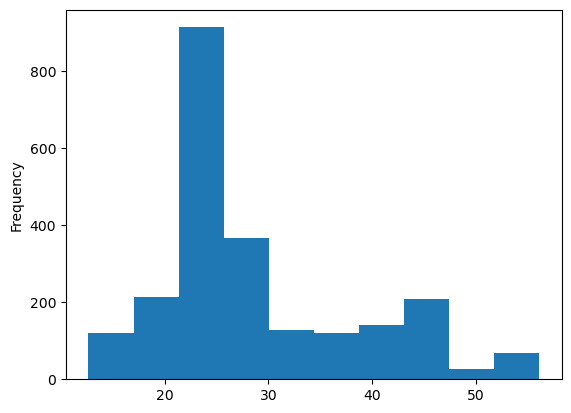

In [275]:
#Con un istogramma, troviamo il range di valori che le azioni di Microsoft hanno assunto più spesso
stock["MSFT"].plot(kind="hist")

Scarichiamo il dataset metal_bands_2017.csv da https://www.kaggle.com/datasets/mrpantherson/metal-by-nation e: 

• Con Seaborn visualizziamo l'istogramma del numero dei fan delle varie band; cosa si vede? Cose ne deduciamo? 

• Delle band che suonano sia Progressive che Thrash, realizziamo un barplot che mostri quanti fan ci sono in totale rispetto al paese di origine (nota: in questo caso specifico, per accedere alla colonna "style" dovremo usare ["style"] e non .style perché quest'ultimo è un metodo) 

• Visualizziamo un istogramma delle date di formazione delle band (potremo dover convertire in qualche modo questo dato); si nota qualche trend?

In [280]:
import seaborn as sns

In [416]:
metal = pd.read_csv("../Desktop/more_datasets/metal_bands_2017.csv", 
                    encoding='latin1', delimiter=',', usecols=['band_name','fans','formed','origin','split','style'])
metal

,band_name,fans,formed,origin,split,style
0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy"
1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"
2,Metallica,3712,1981,United States of America,-,"Heavy,Bay area thrash"
3,Megadeth,3105,1983,United States of America,1983,"Thrash,Heavy,Hard rock"
4,Amon Amarth,3054,1988,Sweden,-,Melodic death
...,...,...,...,...,...,...
4995,Atara,0,2006,France,2006,"Black,Grindcore"
4996,Avicularia,0,2003,Croatia,-,Avantgarde death
4997,Awake,0,2006,United Kingdom,2006,"Heavy,Progressive"
4998,Axatak,0,1983,Australia,1988,"Hard rock,Heavy"


<Axes: xlabel='fans', ylabel='Count'>

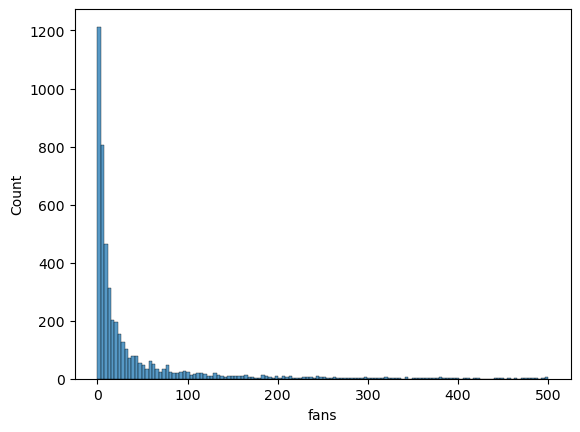

In [418]:
#Con Seaborn visualizziamo l'istogramma del numero dei fan delle varie band; cosa si vede? Cose ne deduciamo?
sns.histplot(data=metal, x="fans", binrange=[0,500])

In [420]:
#numero alto di gruppi con pochi fans, solo poche bands hanno sulle centinaia di fans, e ancora meno gruppi hanno migliaia di fans

<Axes: xlabel='origin'>

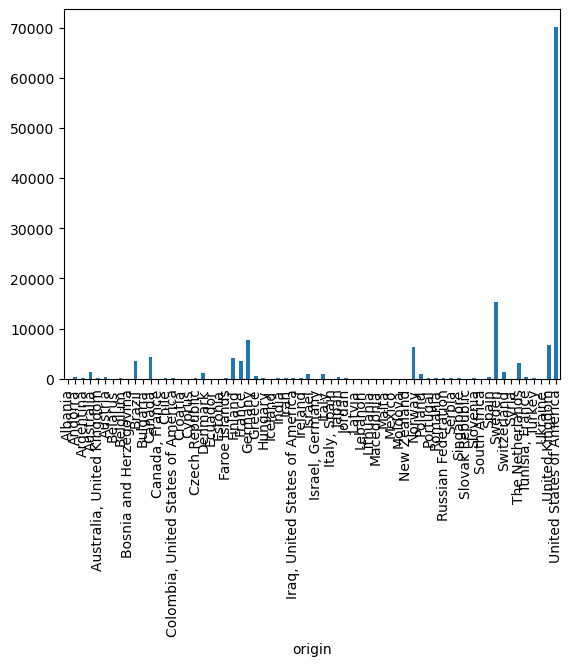

In [422]:
# Delle band che suonano sia Progressive che Thrash, realizziamo un barplot che mostri quanti fan ci sono in totale rispetto al paese di origine
#(nota: in questo caso specifico, per accedere alla colonna "style" dovremo usare ["style"] e non .style perché quest'ultimo è un metodo)
filtro = (metal["style"].str.contains("progressive", case=False)) | (metal["style"].str.contains("thrash", case=False))
metal.loc[filtro].groupby("origin")["fans"].sum().plot(kind="bar")

In [424]:
#Visualizziamo un istogramma delle date di formazione delle band (potremo dover convertire in qualche modo questo dato); si nota qualche trend?

<Axes: xlabel='formed'>

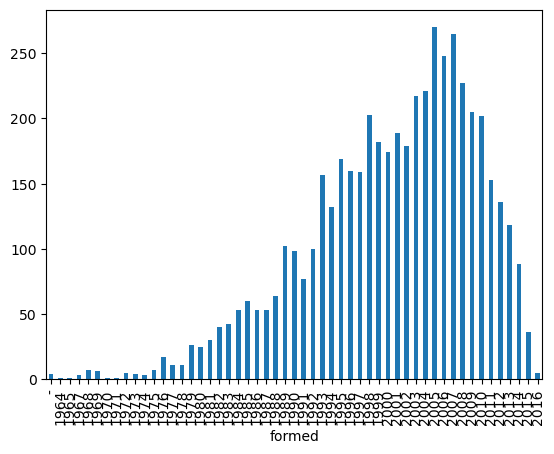

In [494]:
metal["formed"].value_counts().sort_index().plot(kind="bar")

In [428]:
pd.to_datetime(metal["formed"], format='mixed', errors='coerce')  
#errors='coerce': This will replace invalid parsing results with NaT (Not a Time) instead of raising an error, allowing you to identify and handle problematic entries

0      1975-01-01
1      1990-01-01
2      1981-01-01
3      1983-01-01
4      1988-01-01
          ...    
4995   2006-01-01
4996   2003-01-01
4997   2006-01-01
4998   1983-01-01
4999   2014-01-01
Name: formed, Length: 5000, dtype: datetime64[ns]

In [430]:
metal["date"] = pd.to_datetime(metal["formed"], format='mixed', errors='coerce')
#metal["formed"] = metal["formed"].dt.year

In [432]:
metal["date"].dtype

dtype('<M8[ns]')

<Axes: xlabel='date', ylabel='Count'>

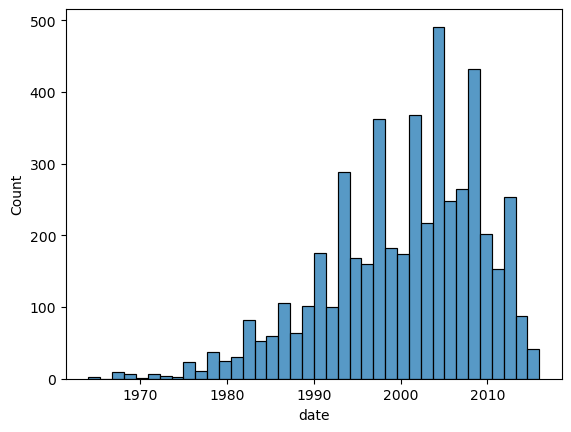

In [454]:
sns.histplot(data=metal, x="date")

<Axes: xlabel='date'>

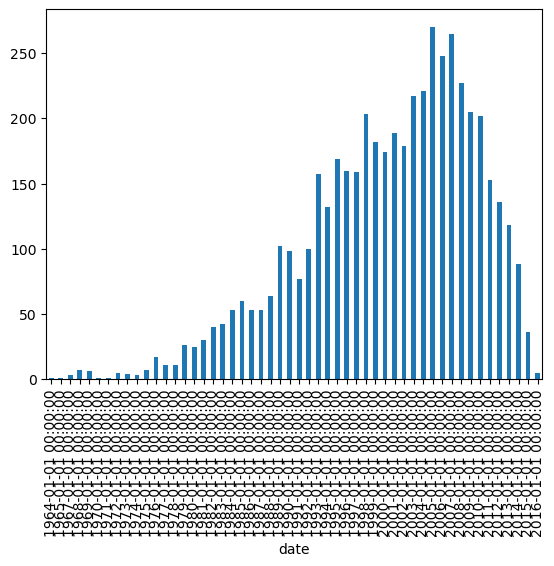

In [490]:
metal["date"].value_counts().sort_index().plot(kind="bar")

In [496]:
#perche' non riesco a fare lo stesso istogramma con plot(kind="hist")?

Scarichiamo il dataset elections.csv da https://github.com/plotly/datasets/blob/master/election.csv: 

• Con un grafico a barre confrontiamo i voti totali presi dai tre candidati (come somma di tutti i distretti) 

• Con un grafico a barre confrontiamo il numero di votanti per ogni distretto 

• Visualizzare un grafico a barre comparativo dove si confrontano i voti presi nei primi 4 distretti per ogni candidato

In [158]:
ele = pd.read_csv("../Desktop/more_datasets/election.csv")
ele

,district,Coderre,Bergeron,Joly,total,winner,result,district_id
0,101-Bois-de-Liesse,2481,1829,3024,7334,Joly,plurality,101
1,102-Cap-Saint-Jacques,2525,1163,2675,6363,Joly,plurality,102
2,11-Sault-au-Récollet,3348,2770,2532,8650,Coderre,plurality,11
3,111-Mile-End,1734,4782,2514,9030,Bergeron,majority,111
4,112-DeLorimier,1770,5933,3044,10747,Bergeron,majority,112
5,113-Jeanne-Mance,1455,3599,2316,7370,Bergeron,plurality,113
6,12-Saint-Sulpice,3252,2521,2543,8316,Coderre,plurality,12
7,121-La Pointe-aux-Prairies,5456,1760,3330,10546,Coderre,majority,121
8,122-Pointe-aux-Trembles,4734,1879,2852,9465,Coderre,majority,122
9,123-Rivière-des-Prairies,5737,958,1656,8351,Coderre,majority,123


<Axes: >

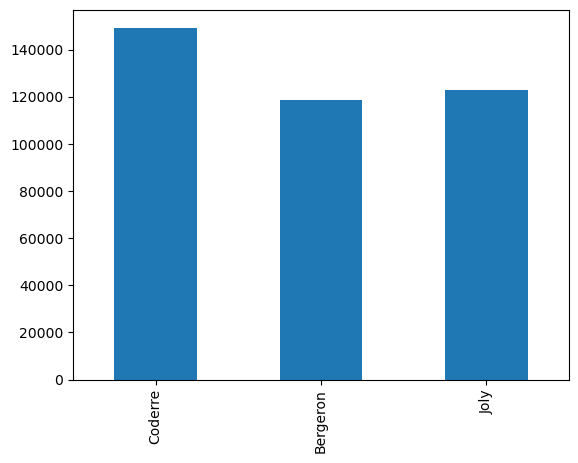

In [160]:
#Con un grafico a barre confrontiamo i voti totali presi dai tre candidati (come somma di tutti i distretti)
ele[["Coderre","Bergeron","Joly"]].sum().plot(kind="bar")

<Axes: >

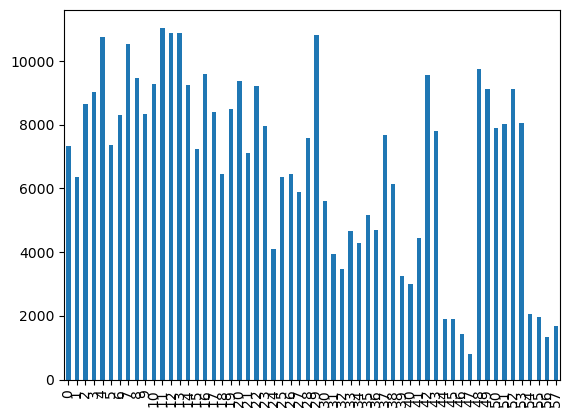

In [162]:
#Con un grafico a barre confrontiamo il numero di votanti per ogni distretto
ele["total"].plot(kind="bar")

In [164]:
#Visualizzare un grafico a barre comparativo dove si confrontano i voti presi nei primi 4 distretti per ogni candidato
ele.loc[0:3][["Coderre","Bergeron","Joly"]]

,Coderre,Bergeron,Joly
0,2481,1829,3024
1,2525,1163,2675
2,3348,2770,2532
3,1734,4782,2514


<Axes: >

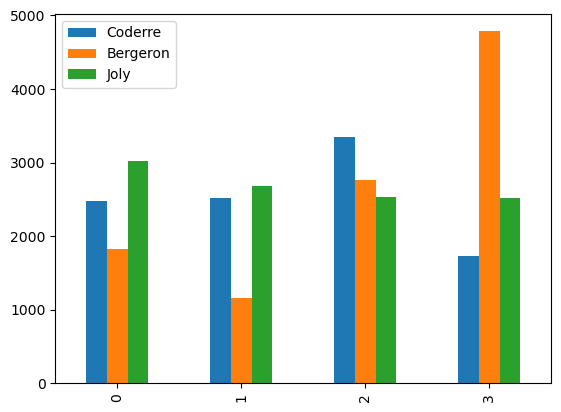

In [187]:
ele.loc[0:3,["Coderre","Bergeron","Joly"]].plot(kind="bar")

<Axes: xlabel='district'>

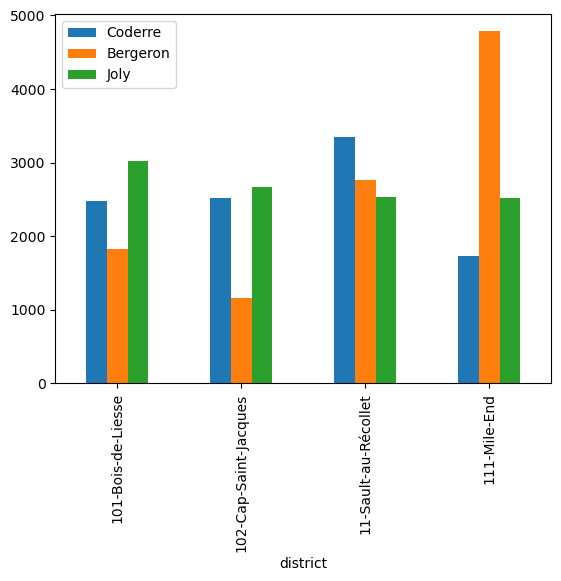

In [168]:
#oppure:
ele_i = ele.copy()
ele_i = ele.set_index("district")
ele_i.iloc[0:4,0:3].plot(kind="bar")

Scarichiamo i file party_in_nyc.csv dal dataset https://www.kaggle.com/datasets/somesnm/partynyc relativo a quante volte è stata chiamata la polizia per delle feste eccessivamente rumorose: 

• Realizziamo un grafico che mostra quante chiamate ci sono state per ogni città per tutti i tipi di locale 

• Qual è il rettangolo di latitudine e longitudine considerato dal dataset? 

• Quante segnalazioni sono state fatte per case private? 

• Con Seaborn visualizziamo il conteggio delle segnalazioni avvenute in ogni quartiere; che succede se aggiungiamo il parametro hue="Location Type"?

In [173]:
party = pd.read_csv("../Desktop/more_datasets/party_in_nyc.csv")
party

,Created Date,Closed Date,Location Type,Incident Zip,City,Borough,Latitude,Longitude
0,2015-12-31 00:01:15,2015-12-31 03:48:04,Store/Commercial,10034.0,NEW YORK,MANHATTAN,40.866183,-73.918930
1,2015-12-31 00:02:48,2015-12-31 04:36:13,Store/Commercial,10040.0,NEW YORK,MANHATTAN,40.859324,-73.931237
2,2015-12-31 00:03:25,2015-12-31 00:40:15,Residential Building/House,10026.0,NEW YORK,MANHATTAN,40.799415,-73.953371
3,2015-12-31 00:03:26,2015-12-31 01:53:38,Residential Building/House,11231.0,BROOKLYN,BROOKLYN,40.678285,-73.994668
4,2015-12-31 00:05:10,2015-12-31 03:49:10,Residential Building/House,10033.0,NEW YORK,MANHATTAN,40.850304,-73.938516
...,...,...,...,...,...,...,...,...
225409,2016-12-31 23:53:57,2017-01-01 00:01:41,Store/Commercial,10003.0,NEW YORK,MANHATTAN,40.730073,-73.986585
225410,2016-12-31 23:55:01,2017-01-01 02:05:06,Residential Building/House,10032.0,NEW YORK,MANHATTAN,40.833144,-73.944617
225411,2016-12-31 23:56:20,2017-01-01 13:34:00,Residential Building/House,11104.0,SUNNYSIDE,QUEENS,40.743662,-73.923067
225412,2016-12-31 23:56:41,2017-01-01 03:49:12,Residential Building/House,10040.0,NEW YORK,MANHATTAN,40.858447,-73.929279


<Axes: xlabel='City'>

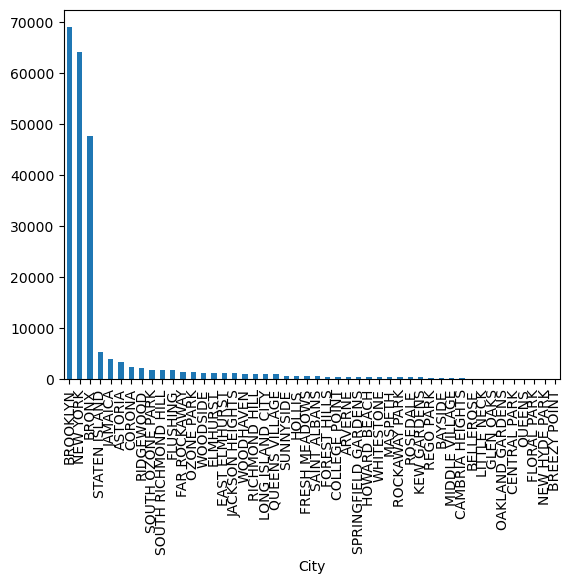

In [193]:
#Realizziamo un grafico che mostra quante chiamate ci sono state per ogni città per tutti i tipi di locale
party["City"].value_counts().plot(kind="bar")

In [197]:
#Qual è il rettangolo di latitudine e longitudine considerato dal dataset?
print(party["Latitude"].agg(["min","max"]))
print(party["Longitude"].agg(["min","max"]))

min    40.498820
max    40.912178
Name: Latitude, dtype: float64
min   -74.251277
max   -73.702303
Name: Longitude, dtype: float64


In [211]:
#Quante segnalazioni sono state fatte per case private?
filtro = party["Location Type"] == "Residential Building/House"
party.loc[filtro]["Created Date"].count()

146040

<Axes: xlabel='Borough', ylabel='count'>

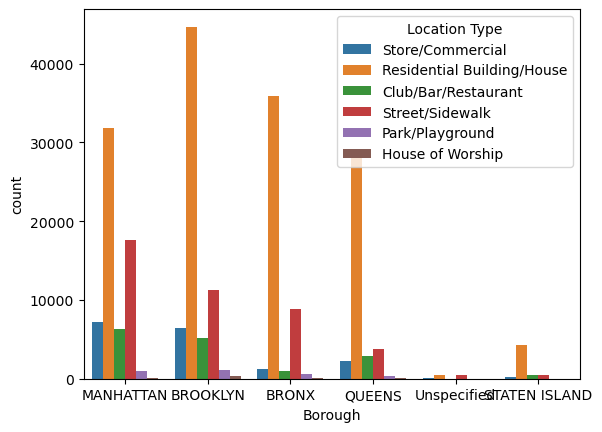

In [215]:
#Con Seaborn visualizziamo il conteggio delle segnalazioni avvenute in ogni quartiere; che succede se aggiungiamo il parametro hue="Location Type"?
sns.countplot(data=party, x="Borough", hue="Location Type")